In [1]:
import mnist_util
import numpy as np
np.set_printoptions(precision=3, suppress=True)
training_labels = mnist_util.read_labels('mnist/train-labels.idx1-ubyte')
training_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [2]:
training_images = mnist_util.read_images('mnist/train-images.idx3-ubyte')
training_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
import PIL.Image as Im
Im.fromarray(255-training_images[0].reshape(28, 28), 'L')

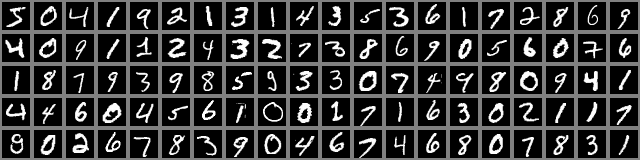

In [4]:
mnist_util.image_matrix(training_images[:100].reshape(5,20,28,28))

In [14]:
import neural
nn = neural.NeuralNetwork([28*28, 16, 10])
training_size, = training_labels.shape
expected_output = np.zeros((training_size, 10))
for i, label in enumerate(training_labels):
    expected_output[i][label] = 1
training_data = training_images / 255.0
nn.apply(training_data[:1])

array([[0.607, 0.584, 0.482, 0.378, 0.553, 0.693, 0.783, 0.659, 0.686,
        0.371]])

In [15]:
w = nn.weights[0];w

array([[0.001, 0.001, 0.   , ..., 0.001, 0.   , 0.001],
       [0.001, 0.   , 0.001, ..., 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.   , ..., 0.001, 0.001, 0.001],
       ...,
       [0.   , 0.   , 0.   , ..., 0.001, 0.   , 0.001],
       [0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001],
       [0.   , 0.   , 0.001, ..., 0.   , 0.001, 0.   ]])

In [7]:
b = nn.biases[0];b

array([ 0.919, -0.757,  0.438,  0.043, -0.682,  0.974,  0.551, -0.66 ,
        0.418, -0.234, -0.753, -0.564, -0.906, -0.859,  0.757,  0.62 ])

In [8]:
x = training_data[0]
z = w.T @ x + b

In [9]:
z

array([ 0.987, -0.686,  0.512,  0.108, -0.616,  1.048,  0.62 , -0.596,
        0.485, -0.168, -0.688, -0.493, -0.831, -0.79 ,  0.829,  0.689])

In [10]:
from neural import sigmoid as s
s(z)

array([0.728, 0.335, 0.625, 0.527, 0.351, 0.74 , 0.65 , 0.355, 0.619,
       0.458, 0.335, 0.379, 0.303, 0.312, 0.696, 0.666])

In [11]:
nn.apply(training_data[:1])

array([[0.686, 0.515, 0.481, 0.767, 0.362, 0.729, 0.5  , 0.772, 0.382,
        0.429]])

In [13]:
def L(b):
    z = w.T @ x + b
    error = (s(z) - expected_output[0])
    return error.dot(error)
L(b)

ValueError: operands could not be broadcast together with shapes (16,) (10,) 

In [ ]:
d_cost = 2*(s(z) - expected_output[0])
d_b = d_cost * neural.sigmoid_derivative(s(z))

In [ ]:
d_cost, d_b

In [ ]:
e0 = np.array([1.,0,0,0,0,0,0,0,0,0])
e5 = np.array([0.,0,0,0,0,1,0,0,0,0])

In [ ]:
h = 0.03
(L(b + h*e0) - L(b))/h, (L(b + h*e5) - L(b))/h

In [ ]:
d_w = d_cost * np.outer(x, neural.sigmoid_derivative(s(z)));
d_w[14*29]

In [16]:
M = 1000
for i in range(1000):
    output = nn.train(training_data[:M], expected_output[:M])
    np.set_printoptions(precision=3, suppress=True)
    result = np.argmax(output, axis=1)
    if i%10 == 0:
        print(np.mean(np.square(expected_output[:M] - output)), np.sum(result != training_labels[:M])*100/M, '% wrong')


0.3368398629436097 90.6 % wrong
0.08994552793082439 91.9 % wrong
0.08987529589581993 89.9 % wrong
0.08983558483124825 87.0 % wrong
0.08978585813631783 83.0 % wrong
0.08971764829834353 79.6 % wrong
0.08961921473952109 79.5 % wrong
0.08947192208646289 79.5 % wrong
0.08924520044341518 79.4 % wrong
0.0888878814253256 79.3 % wrong
0.08831456147176787 78.0 % wrong
0.08738884744676208 73.0 % wrong
0.08592579250291049 70.1 % wrong
0.08379921301541782 69.1 % wrong
0.08115608411188678 68.0 % wrong
0.07831391727030698 66.1 % wrong
0.07542439475919313 61.9 % wrong
0.07256908940495721 57.3 % wrong
0.06985728394877597 52.5 % wrong
0.06734827468697072 48.7 % wrong
0.06504324432724372 46.1 % wrong
0.06292500601241166 43.9 % wrong
0.060968303666661436 42.0 % wrong
0.05913634053207952 40.1 % wrong
0.05738882447374653 37.4 % wrong
0.055692412852001986 35.2 % wrong
0.05402626885171244 33.3 % wrong
0.052380197272708824 32.0 % wrong
0.050748966311892095 30.9 % wrong
0.04912973015883836 29.9 % wrong
0.047523

In [19]:
result = np.argmax(output, axis=1)
np.sum(result != training_labels[:M])

27

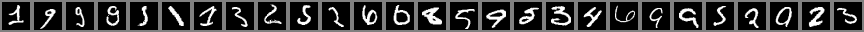

In [20]:
incorrect = training_images[:M][result != training_labels[:M]]
mnist_util.image_matrix(incorrect.reshape(1,27,28,28))

In [23]:
output[result != training_labels[:M]]

array([[0.001, 0.057, 0.011, 0.021, 0.   , 0.055, 0.143, 0.004, 0.058,
        0.068],
       [0.   , 0.015, 0.002, 0.048, 0.011, 0.001, 0.   , 0.538, 0.032,
        0.445],
       [0.005, 0.007, 0.001, 0.084, 0.01 , 0.482, 0.014, 0.003, 0.173,
        0.046],
       [0.239, 0.003, 0.072, 0.016, 0.002, 0.014, 0.005, 0.064, 0.103,
        0.001],
       [0.002, 0.051, 0.037, 0.155, 0.   , 0.022, 0.018, 0.021, 0.179,
        0.031],
       [0.001, 0.004, 0.001, 0.055, 0.186, 0.283, 0.029, 0.001, 0.151,
        0.046],
       [0.003, 0.013, 0.001, 0.011, 0.003, 0.01 , 0.   , 0.162, 0.067,
        0.09 ],
       [0.003, 0.002, 0.001, 0.023, 0.098, 0.304, 0.043, 0.001, 0.038,
        0.17 ],
       [0.208, 0.008, 0.081, 0.01 , 0.005, 0.126, 0.17 , 0.001, 0.001,
        0.002],
       [0.047, 0.018, 0.153, 0.012, 0.   , 0.034, 0.39 , 0.013, 0.026,
        0.003],
       [0.   , 0.27 , 0.028, 0.16 , 0.004, 0.021, 0.008, 0.003, 0.011,
        0.01 ],
       [0.004, 0.005, 0.398, 0.025, 0.159, 

In [24]:
output[:10]

array([[0.04 , 0.004, 0.002, 0.202, 0.   , 0.415, 0.006, 0.006, 0.022,
        0.019],
       [0.946, 0.   , 0.031, 0.014, 0.002, 0.051, 0.002, 0.037, 0.002,
        0.   ],
       [0.006, 0.001, 0.043, 0.062, 0.886, 0.004, 0.018, 0.012, 0.006,
        0.018],
       [0.   , 0.946, 0.083, 0.011, 0.002, 0.006, 0.013, 0.016, 0.063,
        0.007],
       [0.   , 0.008, 0.   , 0.003, 0.158, 0.006, 0.004, 0.059, 0.039,
        0.814],
       [0.021, 0.005, 0.672, 0.011, 0.001, 0.002, 0.048, 0.004, 0.077,
        0.007],
       [0.   , 0.967, 0.027, 0.081, 0.001, 0.027, 0.025, 0.005, 0.045,
        0.084],
       [0.006, 0.005, 0.055, 0.946, 0.002, 0.037, 0.001, 0.005, 0.02 ,
        0.009],
       [0.   , 0.941, 0.014, 0.021, 0.001, 0.028, 0.019, 0.031, 0.094,
        0.093],
       [0.01 , 0.001, 0.006, 0.012, 0.976, 0.029, 0.027, 0.007, 0.015,
        0.018]])